In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
train=pd.read_csv('dr. consultation train.csv')
train=pd.DataFrame(train)

In [3]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
test =pd.read_csv("Final_Test.csv")
test=pd.DataFrame(test)

In [5]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
test.keys()

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [7]:
train.keys()

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

Keys features enables us to check the column names of data sets. Test files have 6 columns while the train files have 7 column, as our target is Fees.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


We get the information regarding the amount, type  of data present in data set
For train file we have 5961 entries in all and the data type is object and Fees column have integer data type.
number of columns are 7.

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


We get the information regarding the amount, type  of data present in data set
For Test file we have 1987 entries in all and the data type is object and Fees column have integer data type.
The number of columns are 6.

In [10]:
train.shape

(5961, 7)

In [11]:
test.shape

(1987, 6)

Here we can see the dimension of the train and test files train files are of dimension 5961 rows and 7 columns and test files dimensions are 1987 rows and 6 columns

In [12]:
train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [13]:
test.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,897,1981,1987,1153
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Mulund West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,223,27,444,10


We only can view the interger or float data in describe, the object data is no recognised in describe command.

In [14]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [15]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

We are checking for null vaules if any and we have found the null values in train as well as test data. We have missing values in column of Rating, place and miscellaneous on test and train files.

In [16]:
train['Qualification'].value_counts()

BDS                                                                              488
BHMS                                                                             477
BAMS                                                                             471
MBBS                                                                             334
MBBS, MS - ENT                                                                   220
                                                                                ... 
DVD, MD - Dermatology                                                              1
BAMS, MS - Ayurvedic General Surgery, Ayurvedic panchkarma                         1
MDS - Oral & Maxillofacial Surgery, BDS, Dip' NMD                                  1
BDS, MDS-Oral Pathology and Oral Microbiology, Certificate in Dental Implants      1
MBBS, Diploma in Dermatology, Diploma in Public Health                             1
Name: Qualification, Length: 1420, dtype: int64

We understand that there are multiple backgrounds of eduactional qualification that the Doctors have in our data set. Here it is bit complicated to plot and understand the graph
hence we will try to simplify this column further.

In [17]:
train['Experience'].value_counts()

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
66 years experience      1
58 years experience      1
65 years experience      1
61 years experience      1
59 years experience      1
Name: Experience, Length: 64, dtype: int64

We observe that very few doctors are having experience above 50 years, majorityof doctors are having experience above 5 years.

In [18]:
train["Experience"] = train["Experience"].str.split()
train["Experience"] = train["Experience"].str[0].astype("int")       # as we need the numerical values only

In [19]:
test["Experience"] = test["Experience"].str.split()
test["Experience"] = test["Experience"].str[0].astype("int")

In [20]:
test['Experience'].value_counts()

10    110
8      98
9      96
19     92
7      89
11     86
13     83
14     81
12     79
17     72
18     70
6      62
15     57
16     51
5      50
23     49
21     48
20     48
29     46
4      44
22     37
24     34
3      33
25     33
26     32
0      31
28     29
27     27
34     27
36     27
31     26
38     23
30     18
32     16
44     16
40     15
37     14
39     13
35     13
41     12
33     11
2      11
46     11
42     10
43     10
47      9
49      8
45      7
48      6
59      4
50      3
51      3
52      2
54      2
53      1
56      1
65      1
Name: Experience, dtype: int64

In [21]:
train['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
79%      13
84%      13
81%      12
67%      12
76%       9
71%       9
75%       8
73%       8
74%       7
60%       7
78%       6
68%       5
56%       5
70%       4
69%       4
72%       3
57%       3
62%       2
55%       2
33%       2
63%       2
64%       2
36%       1
58%       1
47%       1
48%       1
53%       1
40%       1
45%       1
65%       1
7%        1
Name: Rating, dtype: int64

We have removed al the punctuation from train and test data.

<AxesSubplot:xlabel='count', ylabel='Rating'>

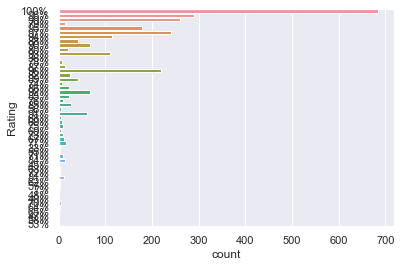

In [22]:
sns.countplot(y='Rating', data= train)

We understand the head count of Dr who have respective ratings from above Grpah, we observe that more than 90% doctors have ratings above 90.

In [23]:
train['Place'].value_counts()

HSR Layout, Bangalore       75
Andheri West, Mumbai        70
Dwarka, Delhi               67
Banjara Hills, Hyderabad    64
Mulund West, Mumbai         54
                            ..
Ganganagar, Bangalore        1
Mankhurd, Mumbai             1
Chullickal, Ernakulam        1
Rohini Sector 2, Delhi       1
Satya Niketan, Delhi         1
Name: Place, Length: 877, dtype: int64

In [24]:
train["Place"] = train["Place"].str.split(",")
train["City"] = train["Place"].str[-1]
train["Place"] = train["Place"].str[0]                        # here we are splicting or creating new colun City, this will help us to simplify the data

In [25]:
test["Place"] = test["Place"].str.split(",")
test["City"] = test["Place"].str[-1]
test["Place"] = test["Place"].str[0]

In [26]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [27]:
test.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
1982,"BAMS, Doctor of Medicine",10,NaN,Basavanagudi,Ayurveda,NaN,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,Choolai,Dermatologists,NaN,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,Porur,General Medicine,NaN,Chennai
1985,BDS,12,98%,Arekere,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Bangalore
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8,NaN,Pallikaranai,Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500",Chennai


Here we observe that the data of Place column too is huge and not aggranged properly hence we have tried to extract data o City rather than fetching the data of localities within the city.

In [28]:
train['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
e                         1
Name: City, dtype: int64

<AxesSubplot:xlabel='count', ylabel='City'>

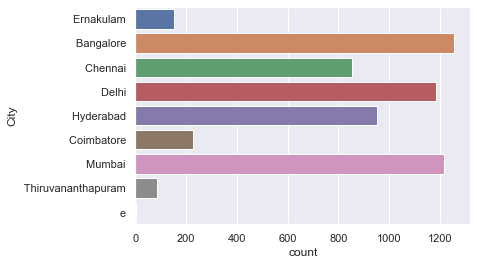

In [29]:
sns.countplot(y = "City", data = train) 

In [30]:
train['Place'].value_counts()

HSR Layout       75
Andheri West     70
Dwarka           68
Banjara Hills    64
Mulund West      54
                 ..
Venkitapuram      1
GTB Nagar         1
Shakurpur         1
Jacob Circle      1
Film Nagar        1
Name: Place, Length: 866, dtype: int64

we have now replaced all the null values from the data with 0.

By using label encoder we have converted the stringdata into interger data. Similarly we will converst the column of places and city in integer data.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profile', ylabel='count'>

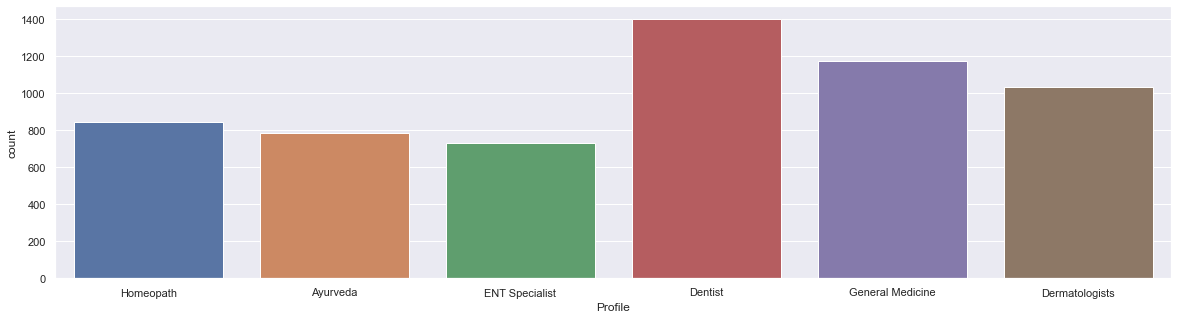

In [31]:
sns.set()
%matplotlib inline
plt.figure(figsize=(20,5))
sns.countplot('Profile',data=train) 

From above graph we observe that Dentist has the highest count followed by Genral medicine, Dermatologists, Homeopath, Ayurveda and last is ENT specialist.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fees', ylabel='Profile'>

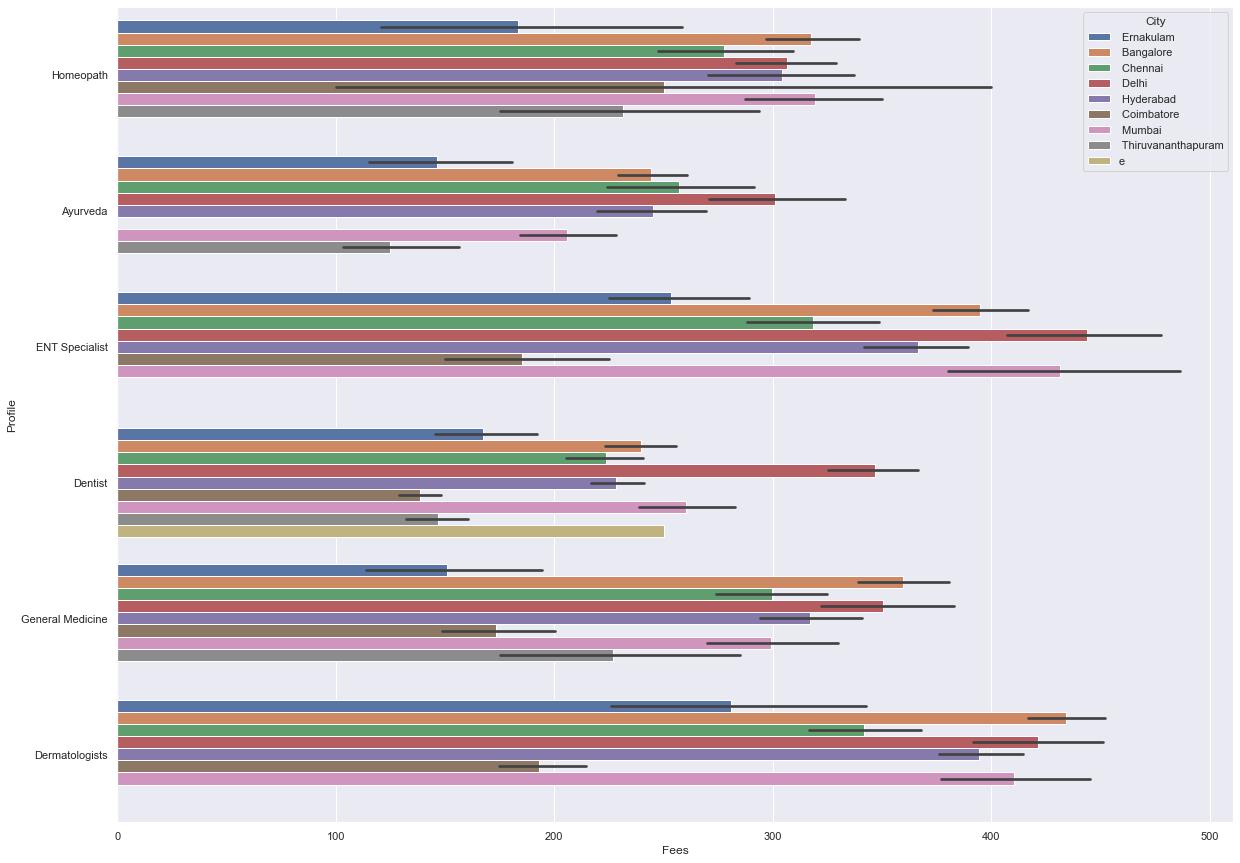

In [32]:
plt.figure(figsize=(20,15))
sns.barplot('Fees','Profile',hue='City',data=train)

From above graph we understand the raltionship between the fees, city and Profile. We observe that the feees of ENT and dermatologist is high in cities of Banglore, Mumbai and Delhi
While Delhi is having highest fees in all the profiles.

From corelation we understand that the Fees and experience is having direct realtionship

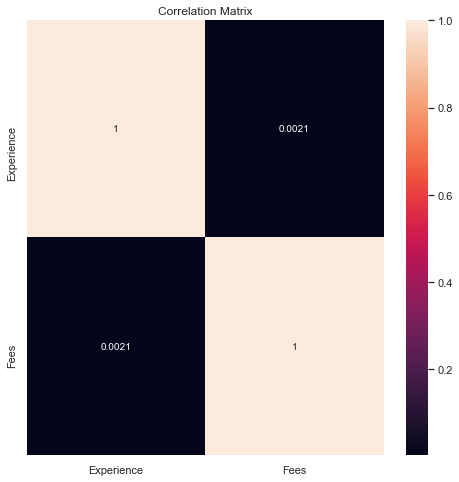

In [33]:
corr_mat=train.corr()
plt.figure(figsize=[8,8])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

Experience    AxesSubplot(0.125,0.125;0.110714x0.755)
dtype: object

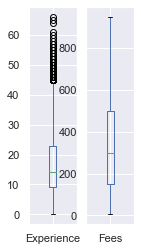

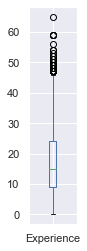

In [34]:
train.plot(kind='box',subplots=True, layout=(1,6))
test.plot(kind='box',subplots=True, layout=(1,6))

In [35]:
def remove_punctuation(x):
    try:
        x=x.str.replace('[^\w\s]','')
    except:
            pass
    return x
test.apply(remove_punctuation)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,MBBS,35,NaN,Ghatkopar East,General Medicine,NaN,Mumbai
1,MBBS Diploma in Otorhinolaryngology DLO,31,NaN,West Marredpally,ENT Specialist,NaN,Hyderabad
2,MBBS DDVL,40,70,KK Nagar,Dermatologists,70 4 Feedback KK Nagar Chennai,Chennai
3,BAMS,0,NaN,New Ashok Nagar,Ayurveda,NaN,Delhi
4,BDS MDS Conservative Dentistry Endodontics,16,100,Kanakpura Road,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore
...,...,...,...,...,...,...,...
1982,BAMS Doctor of Medicine,10,NaN,Basavanagudi,Ayurveda,NaN,Bangalore
1983,MD Dermatology Venereology Leprosy MBBS,4,NaN,Choolai,Dermatologists,NaN,Chennai
1984,MBBS MD MS Obstetrics Gynaecology,9,NaN,Porur,General Medicine,NaN,Chennai
1985,BDS,12,98,Arekere,Dentist,RCT Root Canal Treatment Root Canal Treatment...,Bangalore


In [36]:
def remove_punctuation(x):
    try:
        x=x.str.replace('[^\w\s]','')
    except:
            pass
    return x
train.apply(remove_punctuation)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,BHMS MD Homeopathy,24,100,Kakkanad,Homeopath,100 16 Feedback Kakkanad Ernakulam,100,Ernakulam
1,BAMS MD Ayurveda Medicine,12,98,Whitefield,Ayurveda,98 76 Feedback Whitefield Bangalore,350,Bangalore
2,MBBS MS Otorhinolaryngology,9,NaN,Mathikere BEL,ENT Specialist,NaN,300,Bangalore
3,BSc Zoology BAMS,12,NaN,Bannerghatta Road,Ayurveda,Bannerghatta Road Bangalore 250 Available on S...,250,Bangalore
4,BAMS,20,100,Keelkattalai,Ayurveda,100 4 Feedback Keelkattalai Chennai,250,Chennai
...,...,...,...,...,...,...,...,...
5956,MBBS MS ENT,19,98,Basavanagudi,ENT Specialist,98 45 Feedback Basavanagudi Bangalore,300,Bangalore
5957,MBBS,33,NaN,Nungambakkam,General Medicine,NaN,100,Chennai
5958,MBBS,41,97,Greater Kailash Part 2,General Medicine,97 11 Feedback Greater Kailash Part 2 Delhi,600,Delhi
5959,MBBS MD General Medicine,15,90,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


In [37]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

test['Qualification']=LE.fit_transform(test['Qualification'])
test



,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,241,35,NaN,Ghatkopar East,General Medicine,NaN,Mumbai
1,340,31,NaN,West Marredpally,ENT Specialist,NaN,Hyderabad
2,258,40,70%,KK Nagar,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai
3,6,0,NaN,New Ashok Nagar,Ayurveda,NaN,Delhi
4,79,16,100%,Kanakpura Road,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore
...,...,...,...,...,...,...,...
1982,17,10,NaN,Basavanagudi,Ayurveda,NaN,Bangalore
1983,548,4,NaN,Choolai,Dermatologists,NaN,Chennai
1984,474,9,NaN,Porur,General Medicine,NaN,Chennai
1985,51,12,98%,Arekere,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Bangalore


In [38]:
train['Qualification']=LE.fit_transform(train['Qualification'])
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,401,24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,73,12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,1135,9,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,464,12,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,10,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...,...
5956,1075,19,98%,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,596,33,NaN,Nungambakkam,General Medicine,NaN,100,Chennai
5958,596,41,97%,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,943,15,90%,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   int32 
 1   Experience          1987 non-null   int32 
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
 6   City                1981 non-null   object
dtypes: int32(2), object(5)
memory usage: 93.3+ KB


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   int32 
 1   Experience          5961 non-null   int32 
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
 7   City                5936 non-null   object
dtypes: int32(2), int64(1), object(5)
memory usage: 326.1+ KB


In [41]:
test['City'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Name: City, dtype: int64

In [42]:
train['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
e                         1
Name: City, dtype: int64

In [43]:
test['Profile']=LE.fit_transform(test['Profile'])
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,241,35,NaN,Ghatkopar East,4,NaN,Mumbai
1,340,31,NaN,West Marredpally,3,NaN,Hyderabad
2,258,40,70%,KK Nagar,2,"70% 4 Feedback KK Nagar, Chennai",Chennai
3,6,0,NaN,New Ashok Nagar,0,NaN,Delhi
4,79,16,100%,Kanakpura Road,1,General Dentistry Conservative Dentistry Cosme...,Bangalore
...,...,...,...,...,...,...,...
1982,17,10,NaN,Basavanagudi,0,NaN,Bangalore
1983,548,4,NaN,Choolai,2,NaN,Chennai
1984,474,9,NaN,Porur,4,NaN,Chennai
1985,51,12,98%,Arekere,1,RCT - Root Canal Treatment Root Canal Treatmen...,Bangalore


In [44]:
train['Profile']=LE.fit_transform(train['Profile'])
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,401,24,100%,Kakkanad,5,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,73,12,98%,Whitefield,0,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,1135,9,NaN,Mathikere - BEL,3,NaN,300,Bangalore
3,464,12,NaN,Bannerghatta Road,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,10,20,100%,Keelkattalai,0,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...,...
5956,1075,19,98%,Basavanagudi,3,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,596,33,NaN,Nungambakkam,4,NaN,100,Chennai
5958,596,41,97%,Greater Kailash Part 2,4,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,943,15,90%,Vileparle West,4,General Medical Consultation Viral Fever Treat...,100,Mumbai


In [45]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,241,35,NaN,Ghatkopar East,4,NaN,Mumbai
1,340,31,NaN,West Marredpally,3,NaN,Hyderabad
2,258,40,70%,KK Nagar,2,"70% 4 Feedback KK Nagar, Chennai",Chennai
3,6,0,NaN,New Ashok Nagar,0,NaN,Delhi
4,79,16,100%,Kanakpura Road,1,General Dentistry Conservative Dentistry Cosme...,Bangalore


In [46]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,401,24,100%,Kakkanad,5,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,73,12,98%,Whitefield,0,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,1135,9,NaN,Mathikere - BEL,3,NaN,300,Bangalore
3,464,12,NaN,Bannerghatta Road,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,10,20,100%,Keelkattalai,0,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


We are replacing the missiong values with mode values.

In [47]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
City                     6
dtype: int64

In [48]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
City                    25
dtype: int64

In [49]:
test['Miscellaneous_Info']= test['Miscellaneous_Info'].fillna(test['Miscellaneous_Info'].mode()[0])
test['Place']= test['Place'].fillna(test['Place'].mode()[0])
test['City']= test['City'].fillna(test['City'].mode()[0])

In [50]:
train['Miscellaneous_Info']= train['Miscellaneous_Info'].fillna(train['Miscellaneous_Info'].mode()[0])
train['Place']= train['Place'].fillna(train['Place'].mode()[0])
train['City']= train['City'].fillna(train['City'].mode()[0])

In [51]:
test['City']=LE.fit_transform(test['City'])
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,241,35,NaN,Ghatkopar East,4,Acrylic Partial Denture Crowns and Bridges Fix...,6
1,340,31,NaN,West Marredpally,3,Acrylic Partial Denture Crowns and Bridges Fix...,5
2,258,40,70%,KK Nagar,2,"70% 4 Feedback KK Nagar, Chennai",1
3,6,0,NaN,New Ashok Nagar,0,Acrylic Partial Denture Crowns and Bridges Fix...,3
4,79,16,100%,Kanakpura Road,1,General Dentistry Conservative Dentistry Cosme...,0
...,...,...,...,...,...,...,...
1982,17,10,NaN,Basavanagudi,0,Acrylic Partial Denture Crowns and Bridges Fix...,0
1983,548,4,NaN,Choolai,2,Acrylic Partial Denture Crowns and Bridges Fix...,1
1984,474,9,NaN,Porur,4,Acrylic Partial Denture Crowns and Bridges Fix...,1
1985,51,12,98%,Arekere,1,RCT - Root Canal Treatment Root Canal Treatmen...,0


In [52]:
train['City']=LE.fit_transform(train['City'])
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,401,24,100%,Kakkanad,5,"100% 16 Feedback Kakkanad, Ernakulam",100,4
1,73,12,98%,Whitefield,0,"98% 76 Feedback Whitefield, Bangalore",350,0
2,1135,9,NaN,Mathikere - BEL,3,Acrylic Partial Denture Crowns and Bridges Fix...,300,0
3,464,12,NaN,Bannerghatta Road,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0
4,10,20,100%,Keelkattalai,0,"100% 4 Feedback Keelkattalai, Chennai",250,1
...,...,...,...,...,...,...,...,...
5956,1075,19,98%,Basavanagudi,3,"98% 45 Feedback Basavanagudi, Bangalore",300,0
5957,596,33,NaN,Nungambakkam,4,Acrylic Partial Denture Crowns and Bridges Fix...,100,1
5958,596,41,97%,Greater Kailash Part 2,4,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,3
5959,943,15,90%,Vileparle West,4,General Medical Consultation Viral Fever Treat...,100,6


In [53]:
def remove_punctuation(x):
    try:
        x=x.str.replace('[^\w\s]','')
    except:
            pass
    return x
test.apply(remove_punctuation)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,241,35,NaN,Ghatkopar East,4,Acrylic Partial Denture Crowns and Bridges Fix...,6
1,340,31,NaN,West Marredpally,3,Acrylic Partial Denture Crowns and Bridges Fix...,5
2,258,40,70,KK Nagar,2,70 4 Feedback KK Nagar Chennai,1
3,6,0,NaN,New Ashok Nagar,0,Acrylic Partial Denture Crowns and Bridges Fix...,3
4,79,16,100,Kanakpura Road,1,General Dentistry Conservative Dentistry Cosme...,0
...,...,...,...,...,...,...,...
1982,17,10,NaN,Basavanagudi,0,Acrylic Partial Denture Crowns and Bridges Fix...,0
1983,548,4,NaN,Choolai,2,Acrylic Partial Denture Crowns and Bridges Fix...,1
1984,474,9,NaN,Porur,4,Acrylic Partial Denture Crowns and Bridges Fix...,1
1985,51,12,98,Arekere,1,RCT Root Canal Treatment Root Canal Treatment...,0


In [54]:
def remove_punctuation(x):
    try:
        x=x.str.replace('[^\w\s]','')
    except:
            pass
    return x
train.apply(remove_punctuation)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,401,24,100,Kakkanad,5,100 16 Feedback Kakkanad Ernakulam,100,4
1,73,12,98,Whitefield,0,98 76 Feedback Whitefield Bangalore,350,0
2,1135,9,NaN,Mathikere BEL,3,Acrylic Partial Denture Crowns and Bridges Fix...,300,0
3,464,12,NaN,Bannerghatta Road,0,Bannerghatta Road Bangalore 250 Available on S...,250,0
4,10,20,100,Keelkattalai,0,100 4 Feedback Keelkattalai Chennai,250,1
...,...,...,...,...,...,...,...,...
5956,1075,19,98,Basavanagudi,3,98 45 Feedback Basavanagudi Bangalore,300,0
5957,596,33,NaN,Nungambakkam,4,Acrylic Partial Denture Crowns and Bridges Fix...,100,1
5958,596,41,97,Greater Kailash Part 2,4,97 11 Feedback Greater Kailash Part 2 Delhi,600,3
5959,943,15,90,Vileparle West,4,General Medical Consultation Viral Fever Treat...,100,6


In [55]:
test=test.apply(remove_punctuation).fillna(0)
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,241,35,0,Ghatkopar East,4,Acrylic Partial Denture Crowns and Bridges Fix...,6
1,340,31,0,West Marredpally,3,Acrylic Partial Denture Crowns and Bridges Fix...,5
2,258,40,70,KK Nagar,2,70 4 Feedback KK Nagar Chennai,1
3,6,0,0,New Ashok Nagar,0,Acrylic Partial Denture Crowns and Bridges Fix...,3
4,79,16,100,Kanakpura Road,1,General Dentistry Conservative Dentistry Cosme...,0
...,...,...,...,...,...,...,...
1982,17,10,0,Basavanagudi,0,Acrylic Partial Denture Crowns and Bridges Fix...,0
1983,548,4,0,Choolai,2,Acrylic Partial Denture Crowns and Bridges Fix...,1
1984,474,9,0,Porur,4,Acrylic Partial Denture Crowns and Bridges Fix...,1
1985,51,12,98,Arekere,1,RCT Root Canal Treatment Root Canal Treatment...,0


In [56]:
train=train.apply(remove_punctuation).fillna(0)
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,401,24,100,Kakkanad,5,100 16 Feedback Kakkanad Ernakulam,100,4
1,73,12,98,Whitefield,0,98 76 Feedback Whitefield Bangalore,350,0
2,1135,9,0,Mathikere BEL,3,Acrylic Partial Denture Crowns and Bridges Fix...,300,0
3,464,12,0,Bannerghatta Road,0,Bannerghatta Road Bangalore 250 Available on S...,250,0
4,10,20,100,Keelkattalai,0,100 4 Feedback Keelkattalai Chennai,250,1
...,...,...,...,...,...,...,...,...
5956,1075,19,98,Basavanagudi,3,98 45 Feedback Basavanagudi Bangalore,300,0
5957,596,33,0,Nungambakkam,4,Acrylic Partial Denture Crowns and Bridges Fix...,100,1
5958,596,41,97,Greater Kailash Part 2,4,97 11 Feedback Greater Kailash Part 2 Delhi,600,3
5959,943,15,90,Vileparle West,4,General Medical Consultation Viral Fever Treat...,100,6


In [57]:
test['Miscellaneous_Info']=LE.fit_transform(test['Miscellaneous_Info'])
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,241,35,0,Ghatkopar East,4,598,6
1,340,31,0,West Marredpally,3,598,5
2,258,40,70,KK Nagar,2,153,1
3,6,0,0,New Ashok Nagar,0,598,3
4,79,16,100,Kanakpura Road,1,816,0
...,...,...,...,...,...,...,...
1982,17,10,0,Basavanagudi,0,598,0
1983,548,4,0,Choolai,2,598,1
1984,474,9,0,Porur,4,598,1
1985,51,12,98,Arekere,1,975,0


In [58]:
train['Miscellaneous_Info']=LE.fit_transform(train['Miscellaneous_Info'])
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,401,24,100,Kakkanad,5,130,100,4
1,73,12,98,Whitefield,0,1422,350,0
2,1135,9,0,Mathikere BEL,3,1595,300,0
3,464,12,0,Bannerghatta Road,0,1695,250,0
4,10,20,100,Keelkattalai,0,253,250,1
...,...,...,...,...,...,...,...,...
5956,1075,19,98,Basavanagudi,3,1385,300,0
5957,596,33,0,Nungambakkam,4,1595,100,1
5958,596,41,97,Greater Kailash Part 2,4,1173,600,3
5959,943,15,90,Vileparle West,4,2202,100,6


In [59]:
test['Place']=LE.fit_transform(test['Place'])
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,241,35,0,142,4,598,6
1,340,31,0,577,3,598,5
2,258,40,70,212,2,153,1
3,6,0,0,373,0,598,3
4,79,16,100,231,1,816,0
...,...,...,...,...,...,...,...
1982,17,10,0,58,0,598,0
1983,548,4,0,96,2,598,1
1984,474,9,0,423,4,598,1
1985,51,12,98,26,1,975,0


In [60]:
train['Place']=LE.fit_transform(train['Place'])
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,401,24,100,296,5,130,100,4
1,73,12,98,855,0,1422,350,0
2,1135,9,0,452,3,1595,300,0
3,464,12,0,68,0,1695,250,0
4,10,20,100,335,0,253,250,1
...,...,...,...,...,...,...,...,...
5956,1075,19,98,70,3,1385,300,0
5957,596,33,0,535,4,1595,100,1
5958,596,41,97,215,4,1173,600,3
5959,943,15,90,840,4,2202,100,6


In [61]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,401,24,100,296,5,130,100,4
1,73,12,98,855,0,1422,350,0
2,1135,9,0,452,3,1595,300,0
3,464,12,0,68,0,1695,250,0
4,10,20,100,335,0,253,250,1


In [62]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,241,35,0,142,4,598,6
1,340,31,0,577,3,598,5
2,258,40,70,212,2,153,1
3,6,0,0,373,0,598,3
4,79,16,100,231,1,816,0


Now we have all the data in interger format.


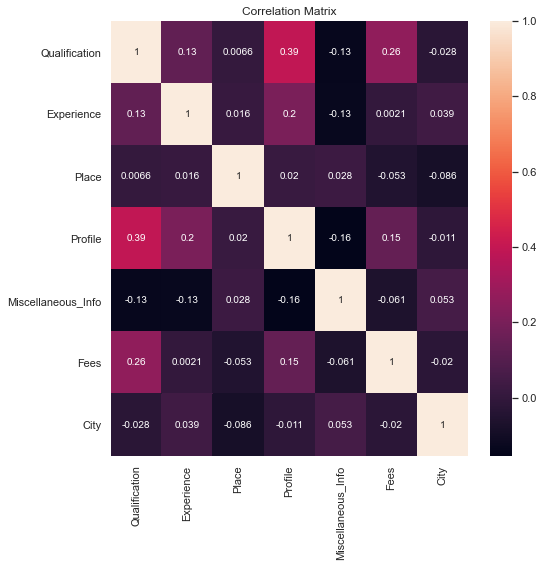

In [63]:
corr_mat=train.corr()
plt.figure(figsize=[8,8])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

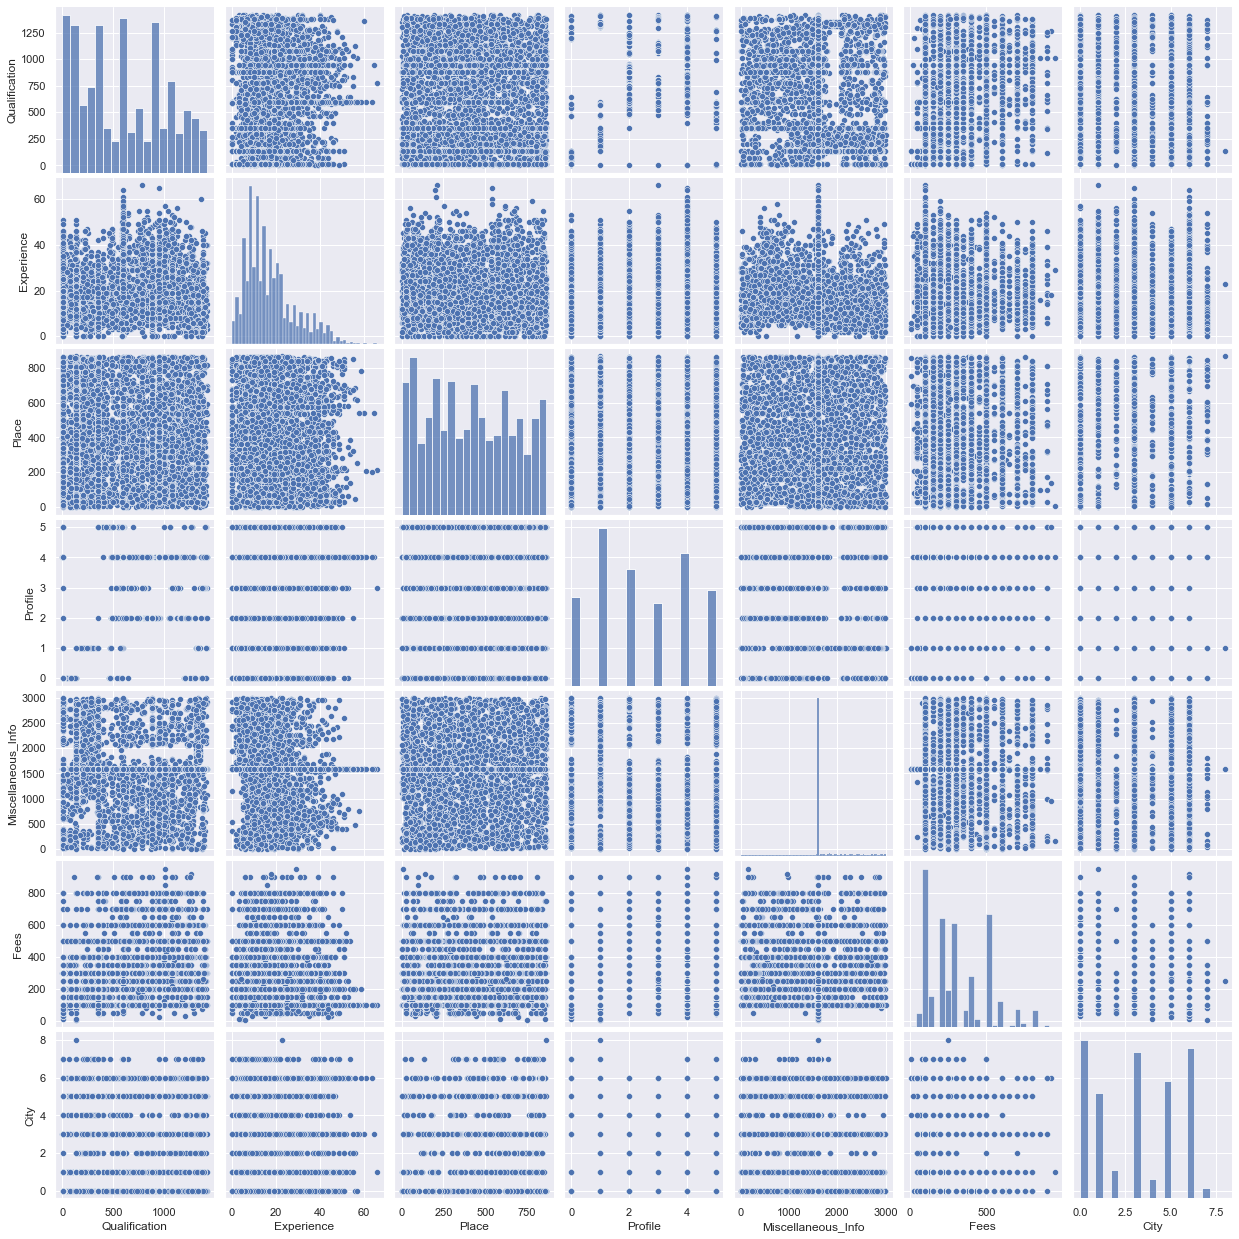

In [64]:
sns.pairplot(train)

We understand that all the columns have siginficant influence on fees.

In [65]:
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
x = train.drop("Fees",axis=1)
y = train["Fees"]

In [66]:
x.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,401,24,100,296,5,130,4
1,73,12,98,855,0,1422,0
2,1135,9,0,452,3,1595,0
3,464,12,0,68,0,1695,0
4,10,20,100,335,0,253,1


In [67]:
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=22)

In [69]:
y_train

1486    500
62      200
2024    300
1845    400
855     300
       ... 
4587    300
5478    700
356      60
4908    400
2933    500
Name: Fees, Length: 4768, dtype: int64

This is an example of Regression hence we will use logestic regression, Random forest and decisiontree

In [70]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [71]:
pred=lm.predict(x_test)
print('Prediction :',pred)
print('Actual value ', y_test) 

Prediction : [342.1076737  281.97925653 358.65119499 ... 289.2373528  355.49190556
 378.84634433]
Actual value  4093    400
3217    500
3831    100
783     600
4228    500
       ... 
998     750
2873    200
5875    100
4575    250
3461    150
Name: Fees, Length: 1193, dtype: int64


Evaluation Metrics

In [72]:
print('LinearRegression')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print("r2 score is ", r2_score(y_test,pred))
print('Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('Mean squared error is ',mean_squared_error(y_test,pred))

LinearRegression
Mean absolute error: 147.90790961244474
r2 score is  0.09257073241264036
Root mean Squared Error: 182.75771343162717
Mean squared error is  33400.38181875676


In [73]:
print("lm_coefficeient is", lm.coef_)
print("lm_intercept is ", lm.intercept_)
print('Lm score is ',lm.score(x_train,y_train))

lm_coefficeient is [ 1.05235343e-01 -7.97304881e-01  6.73662437e-01 -3.48437522e-02
  1.07251985e+01  6.04623630e-03 -8.43203891e-01]
lm_intercept is  210.58020068965067
Lm score is  0.10076344853780894


In [74]:
from sklearn.model_selection  import cross_val_score as cvs
def cross_val(model_name,model,x,y,cv):
    
    scores = cvs(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [75]:
cross_val(lm,LinearRegression(),x,y,5)

LinearRegression() Scores:
0.1
0.1
0.1
0.09
0.09
Average LinearRegression() score: 0.0959


In [76]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

In [77]:
predrf=RF.predict(x_test)
print('RF Prediction :',predrf)
print('Actual value ', y_test) 

RF Prediction : [406.48092431 281.62485454 386.65650278 ... 299.68068357 287.56451524
 364.45641958]
Actual value  4093    400
3217    500
3831    100
783     600
4228    500
       ... 
998     750
2873    200
5875    100
4575    250
3461    150
Name: Fees, Length: 1193, dtype: int64


In [78]:
print('RandomForestRegressor')
print('RF Mean absolute error:',mean_absolute_error(y_test,predrf))
print("RF r2 score is ", r2_score(y_test,predrf))
print('RF Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('RF Mean squared error is ',mean_squared_error(y_test,predrf))

RandomForestRegressor
RF Mean absolute error: 139.93958178284856
RF r2 score is  0.16010919811106328
RF Root mean Squared Error: 175.8250449054799
RF Mean squared error is  30914.446416014023


In [79]:
cross_val(RF,RandomForestRegressor(),x,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.18
0.18
0.22
0.2
0.19
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.1958


In [80]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.01)
#ls=Lasso(alpha=0.1) is adefault value
ls.fit(x_train,y_train)
print('Lasso Score is ',ls.score(x_train,y_train) )

Lasso Score is  0.10076344669416137


In [81]:

print('ls Mean absolute error:',mean_absolute_error(y_test,predrf))
print("ls r2 score is ", r2_score(y_test,predrf))
print('ls Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('ls Mean squared error is ',mean_squared_error(y_test,predrf))

ls Mean absolute error: 139.93958178284856
ls r2 score is  0.16010919811106328
ls Root mean Squared Error: 175.8250449054799
ls Mean squared error is  30914.446416014023


cross_val(ls,Lasso(),x,y,5)

From r2 values we conclude that LinearRegression is the best model.

In [ ]:
Hyper parameter tunning

In [84]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    5.6s finished


In [85]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.09441119727132471
Best Params:  {'alpha': 1}


We are getting best score of 0.0944 and best parameter is when alpha is 1.
Saving the model

In [87]:
import joblib
joblib.dump(grid_result,"Doctor Consultation.pkl")

['Doctor Consultation.pkl']